In [1]:
import pandas as pd
import numpy as np
from optimize_classification import calculate_final_metrics, calculate_final_metrics_xgb, calculate_metrics, create_dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import shap
from matplotlib import pyplot as plt

In [2]:
df = create_dataset()
X = df.iloc[:, 0:22]
scaler = MinMaxScaler()
num_cols = X.iloc[:, 0:10].columns
X[num_cols] = scaler.fit_transform(X[num_cols])
with open('rf_results_filtered/best_rf_filtered_Stick_0.pickle', 'rb') as f:
    model = pickle.load(f)
y = df['Stick'].to_list()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0, shuffle=True
)
calculate_metrics(model, X_test, y_test)

(0.7971014492753623, 0.7804545454545455)

In [3]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

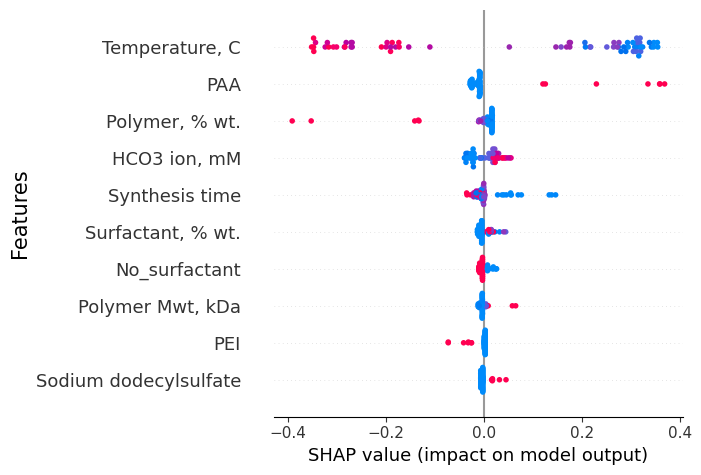

In [15]:
plt.rcParams.update({'font.size': 15})
shap.summary_plot(shap_values[0], X_test, max_display = 10, plot_size = (7, 5), show = False, color_bar=False)
#plt.title('Stick', y = 1.03)
plt.ylabel("Features")
plt.show()